In [ ]:
!pip install comet_ml

In [1]:
import comet_ml

In [2]:
from comet_ml import Experiment

In [3]:
comet = Experiment(api_key="KY2FKGd0W5CRZJiGgHVU5nHDu",
                        project_name="general", workspace="jolinda-hub")

COMET INFO: old comet version (3.1.11) detected. current: 3.1.12 please update your comet lib with command: `pip install --no-cache-dir --upgrade comet_ml`
COMET INFO: Experiment is live on comet.ml https://www.comet.ml/jolinda-hub/general/2a3284b465184408a643455355d8f79a



In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer

from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
from sklearn import metrics
from imblearn.over_sampling import ADASYN

In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
train

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
...,...,...,...
15814,1,RT @ezlusztig: They took down the material on ...,22001
15815,2,RT @washingtonpost: How climate change could b...,17856
15816,0,notiven: RT: nytimesworld :What does Trump act...,384248
15817,-1,RT @sara8smiles: Hey liberals the climate chan...,819732


In [5]:
New_df=train.set_index('tweetid')

In [6]:
New_df

,sentiment,message
tweetid,,
625221,1,PolySciMajor EPA chief doesn't think carbon di...
126103,1,It's not like we lack evidence of anthropogeni...
698562,2,RT @RawStory: Researchers say we have three ye...
573736,1,#TodayinMaker# WIRED : 2016 was a pivotal year...
466954,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ..."
...,...,...
22001,1,RT @ezlusztig: They took down the material on ...
17856,2,RT @washingtonpost: How climate change could b...
384248,0,notiven: RT: nytimesworld :What does Trump act...


In [7]:
all_sents = []
for i, row in train.iterrows():
    for post in row['message'].split('|||'):
        all_sents.append([row['sentiment'], post])
all_sents = pd.DataFrame(all_sents, columns=['sentiment', 'message'])

In [8]:
# Remove urls
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
all_sents['message'] = all_sents['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [9]:
# Make lower case
all_sents['message'] = all_sents['message'].str.lower()

In [10]:
# Strip out punctuation marks and numerals
import string
def remove_punctuation_numbers(message):
    punc_numbers = string.punctuation + '0123456789'
    return ''.join([l for l in message if l not in punc_numbers])

all_sents['message'] = all_sents['message'].apply(remove_punctuation_numbers)

In [11]:
sum_sents = all_sents[['sentiment', 'message']].groupby('sentiment').count()

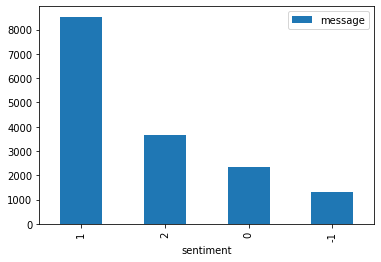

In [12]:
# Plot posts by sentiment classes
sum_sents.sort_values('message', ascending=False).plot(kind='bar')

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(all_sents['message'])

In [15]:
X_count.shape

(15820, 24169)

In [21]:
vect_new = CountVectorizer(lowercase=True, stop_words='english',max_features=900,analyzer='word', ngram_range=(1, 3))
X_count = vect_new.fit_transform(all_sents['message'])

In [22]:
X = X_count.toarray()

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(all_sents['sentiment'])

In [24]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)
type_labels2 = all_sents['sentiment']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)

In [27]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

In [28]:
logreg.fit(X_train, y_train)

C:\Users\Jolinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jolinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [30]:
# Classification report
from sklearn.metrics import classification_report
# Getting predicions from the X_test
y_pred_test
#Pritting the classification report
print(metrics.classification_report(y_test,y_pred_test))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.64      0.26      0.37       270
           1       0.56      0.39      0.46       446
           2       0.72      0.85      0.78      1729
           3       0.69      0.69      0.69       719

    accuracy                           0.70      3164
   macro avg       0.65      0.54      0.57      3164
weighted avg       0.68      0.70      0.68      3164

0.6956384323640961


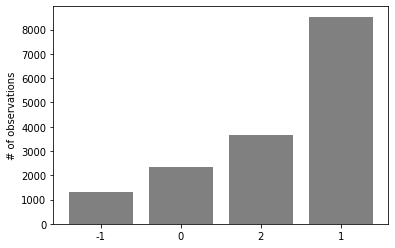

In [35]:
heights = [len(y[y == label]) for label in range(len(type_labels))]
bars = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars = bars.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.show()

In [30]:
vect_new = CountVectorizer(lowercase=True, stop_words='english',max_features=500,analyzer='word', ngram_range=(1, 3))
X_count = vect_new.fit_transform(all_sents['message'])

In [31]:
X = X_count.toarray()

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(all_sents['sentiment'])

In [33]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)
type_labels2 = all_sents['sentiment']

In [32]:
# Let's pick a class size of roughly half the size of the largest size
class_size = 30000

In [33]:
data = np.concatenate([X, y[:,np.newaxis]], axis=1)

In [36]:
bar_label_df = bars.set_index('labels')

In [37]:
resampled_classes = []

# For each label
for label in range(len(type_labels)):
    # Get num. of observations from this class
    label_size = bar_label_df.loc[label]['heights']
    
    # If label_size < class size the upsample, else downsample
    if label_size < class_size:
        # Upsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=True, # sample with replacement (we need to duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
    else:
        # Downsample
        label_data = data[data[:,-1] == label]
        label_resampled = resample(label_data,
                                  replace=False, # sample without replacement (no need for duplicate observations)
                                  n_samples=class_size, # number of desired samples
                                  random_state=27) # reproducible results
        
    resampled_classes.append(label_resampled)

In [38]:
resampled_data = np.concatenate(resampled_classes, axis=0)

In [39]:
resampled_data.shape

(120000, 901)

In [40]:
X_resampled = resampled_data[:,:-1]

In [41]:
y_resampled = resampled_data[:,-1]

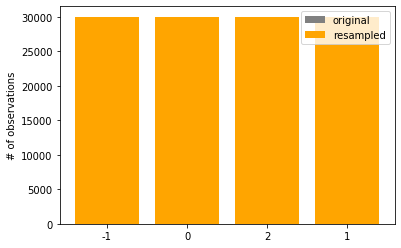

In [42]:
heights = [len(y_resampled[y_resampled == label]) for label in range(len(type_labels))]
bars_resampled = pd.DataFrame(zip(heights,le.transform(type_labels).T, type_labels), columns=['heights','labels','names'])
bars_resampled = bars_resampled.sort_values(by='heights',ascending=True)

plt.bar(range(len(bars)),bars['heights'],color='grey')
plt.bar(range(len(bars_resampled)),bars_resampled['heights'],color='orange')
plt.xticks(range(len(bars)),bars['names'])
plt.ylabel("# of observations")
plt.legend(['original','resampled'])
plt.show()

In [43]:
# Setting up the train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=27)

In [44]:
# Training the logistic regression model on our rebalanced data
logreg = LogisticRegression(multi_class='ovr')
logreg.fit(X_train, y_train)

C:\Users\Jolinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Jolinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [46]:
# Classification report
from sklearn.metrics import classification_report
# Getting predicions from the X_test
y_pred_test
#Pritting the classification report
print(metrics.classification_report(y_test,y_pred_test))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.72      0.69      0.71      5948
           1       0.63      0.66      0.64      6054
           2       0.69      0.59      0.64      5990
           3       0.73      0.83      0.78      6008

    accuracy                           0.69     24000
   macro avg       0.69      0.69      0.69     24000
weighted avg       0.69      0.69      0.69     24000

0.69375


In [47]:
std_scale = StandardScaler()
X_train_scaled = std_scale.fit_transform(X_train)
X_test_scaled = std_scale.transform(X_test)


In [48]:
logreg = LogisticRegression()
param_grid = {'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}

In [ ]:
clf = GridSearchCV(logreg,
                   param_grid=param_grid,
                   cv=10,
                   n_jobs=-1)

clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

In [208]:
params = {"random_state": 27,
          "model_type": "logreg",
          "scaler": "standard scaler",
          "param_grid": str(param_grid),
          "stratify": False
          }
#metrics = print(metrics.classification_report(y_test,y_pred_test))

In [210]:
comet.log_parameters(params)
#comet.log_metrics(metrics)

In [211]:
comet.end()

COMET INFO: ---------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.ml/jolinda-hub/general/af052318a2784847851058e163c36c33
COMET INFO:   Parameters [count]:
COMET INFO:     C [2]             : 0.01
COMET INFO:     class_weight      : 1
COMET INFO:     dual              : 1
COMET INFO:     fit_intercept     : True
COMET INFO:     intercept_scaling : 1
COMET INFO:     l1_ratio          : 1
COMET INFO:     max_iter          : 100
COMET INFO:     model_type        : logreg
COMET INFO:     multi_class [2]   : auto
COMET INFO:     n_jobs            : 1
COMET INFO:     param_grid        : {'C': [0.001, 0.01, 0.1, 1, 5, 10, 20, 50, 100]}
COMET INFO:     penalty           : l2
COMET INFO:     random_state [2]  : 27
COMET INFO:     scaler            : standard scaler
COMET INFO:     solver            : lbfgs
COMET INFO:     s

In [213]:
comet.display()

In [10]:
train.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [11]:
train['sentiment'].unique()

array([ 1,  2,  0, -1], dtype=int64)

In [12]:
train['sentiment'].value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

In [14]:
pattern_url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
subs_url = r'url-web'
train['message'] = train['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)
test['message'] = test['message'] .replace(to_replace = pattern_url, value = subs_url, regex = True)

In [15]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jolinda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jolinda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
stop_words = set(stopwords.words("english")) 
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = re.sub('<[^<]+?>','', text)
    text = re.sub(r'[^\w\s]','',text, re.UNICODE)
    text = text.lower()
    text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    text = [lemmatizer.lemmatize(token, "v") for token in text]
    text = [word for word in text if not word in stop_words]
    text = " ".join(text)
    return text

train['Processed_message'] = train.message.apply(lambda x: clean_text(x))

test['Processed_message'] = test.message.apply(lambda x: clean_text(x))


In [17]:
X=train['Processed_message']
#Dependent feature of the train dataframe
y=train['sentiment'] 
#Independent feature of test dataframe
x_unseen=test['Processed_message'] #test independent feature

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print('Training Data Shape:', X_train.shape)
print('Testing Data Shape: ', X_test.shape)

Training Data Shape: (14237,)
Testing Data Shape:  (1582,)


In [24]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', 
                             min_df=1, 
                             max_df=0.9, 
                             ngram_range=(1, 2))),
                     ('LG',LogisticRegression()),
])
#Fitting the model with train dataset
text_clf.fit(X_train, y_train)

C:\Users\Jolinda\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=0.9, max_features=None,
                                 min_df=1, ngram_range=(1, 2), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words='english', strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('LG',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_sca

In [22]:
# Getting predicions from the X_test
predictions = text_clf.predict(X_test)
#Pritting the classification report
print(metrics.classification_report(y_test,predictions))
# Print the overall accuracy
print(metrics.accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

          -1       0.80      0.35      0.49       126
           0       0.67      0.33      0.45       224
           1       0.76      0.88      0.82       895
           2       0.73      0.80      0.76       337

    accuracy                           0.75      1582
   macro avg       0.74      0.59      0.63      1582
weighted avg       0.74      0.75      0.73      1582

0.7458912768647282


In [51]:
# use the model to make predictions with the test data
predictions = text_clf.predict(X_test)
# how did our model perform?
count_misclassified = (y_test != predictions).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, predictions)
print('Accuracy: {:.2f}'.format(accuracy))


Misclassified samples: 402
Accuracy: 0.75


In [215]:
print("\nResults\nConfusion matrix \n {}".format(
    confusion_matrix(y_test,y_pred_test)))


Results
Confusion matrix 
 [[4237  994  409  308]
 [ 708 4160  684  502]
 [ 571  992 3591  836]
 [ 218  350  405 5035]]


In [217]:
# Saving each metric to add to a dictionary for logging

f1 = f1_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].